Import Sentiment related modules

In [3]:
import sys
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Get the current working directory
current_dir = os.getcwd()
print(f"Current working directory: {current_dir}")

# Check if we need to change directory to the project root
if os.path.basename(current_dir) == 'scripts':
    project_root = os.path.dirname(current_dir)
    os.chdir(project_root)
    print(f"Changed working directory to: {project_root}")
    sys.path.append(current_dir)
else:
    scripts_path = os.path.join(current_dir, 'scripts')
    if os.path.exists(scripts_path):
        sys.path.append(scripts_path)

# Import modules
try:
    from sentiment_utils import apply_bert_sentiment, aggregate_sentiment
except ImportError as e:
    # Fallback logic if imports fail directly
    sys.path.append(os.getcwd())
    from sentiment_utils import apply_bert_sentiment, aggregate_sentiment


Current working directory: c:\Users\mihret.mekbebe\Documents\REQUESTS\KAIM\Customer-Experience-Analytics-for-Fintech-Apps-Week2


c:\Users\mihret.mekbebe\Documents\REQUESTS\KAIM\Customer-Experience-Analytics-for-Fintech-Apps-Week2\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Device set to use cpu


In [ ]:
# Load the processed data
data_path = os.path.join(project_root, 'data', 'processed', 'reviews_processed.csv')
if not os.path.exists(data_path):
    raise FileNotFoundError(f"Data file not found: {data_path}")
reviews_df = pd.read_csv(data_path)
# Apply BERT sentiment analysis
reviews_df = apply_bert_sentiment(reviews_df, "review_text")
# Aggregate sentiment scores
sentiment_df = aggregate_sentiment(reviews_df, "bank_code", "rating", "bert_score")  


In [5]:
reviews_df.head()  # Display the first few rows of the DataFrame

,review_text,rating,review_date,bank_code,bank_name,source,bert_sentiment,bert_score,bert_numeric
0,🙏👍,5,2025-11-29,BOA,Bank of Abyssinia,Google Play,NEGATIVE,0.697057,-1
1,Very Good,5,2025-11-28,BOA,Bank of Abyssinia,Google Play,POSITIVE,0.999852,1
2,goof,5,2025-11-28,BOA,Bank of Abyssinia,Google Play,NEGATIVE,0.997528,-1
3,good!,5,2025-11-28,BOA,Bank of Abyssinia,Google Play,POSITIVE,0.999827,1
4,good jop,5,2025-11-27,BOA,Bank of Abyssinia,Google Play,POSITIVE,0.999841,1


In [6]:
sentiment_df.head()  # Display the first few rows of the aggregated sentiment DataFrame

,bank_code,rating,bert_score
0,BOA,1,0.975930
1,BOA,2,0.952529
2,BOA,3,0.961126
3,BOA,4,0.944500
4,BOA,5,0.950363


Box plots to compare each banks Sentiment Scores

C:\Users\mihret.mekbebe\AppData\Local\Temp\ipykernel_18724\2332630442.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=banks)


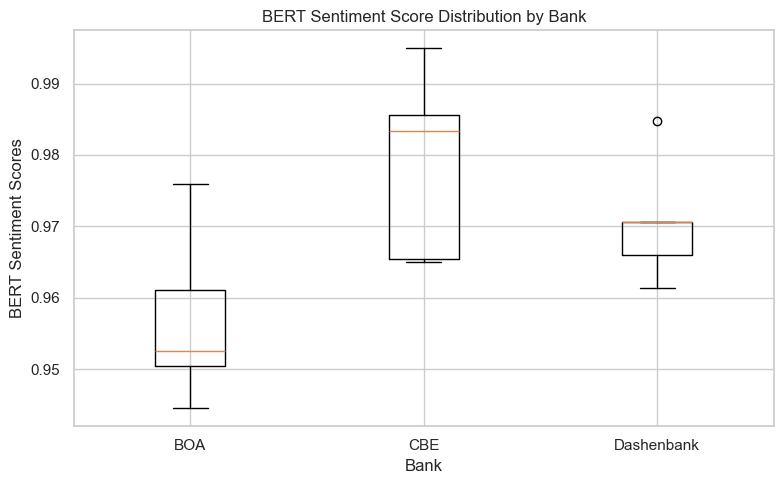

In [ ]:
plt.figure(figsize=(8, 5))
banks = sentiment_df['bank_code'].unique() # Get unique bank codes

data = [sentiment_df[sentiment_df['bank_code'] == b]['bert_score'] for b in banks] # Prepare data for boxplot
plt.boxplot(data, labels=banks) 
plt.xlabel('Bank')
plt.ylabel('BERT Sentiment Scores')
plt.title('BERT Sentiment Score Distribution by Bank')
plt.tight_layout()
plt.show()

Heatmap to show relationship between ratings and bert_score for each banks

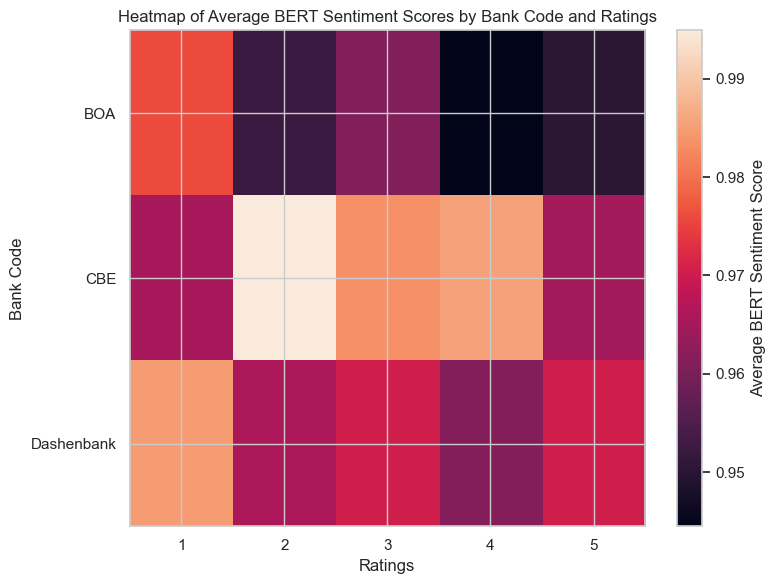

In [ ]:
pivot = sentiment_df.pivot(index='bank_code', columns='rating', values='bert_score') # Create pivot table for heatmap
plt.figure(figsize=(8, 6))
plt.imshow(pivot, aspect='auto')
plt.xticks(ticks=range(len(pivot.columns)), labels=pivot.columns) # Set x-ticks to ratings
plt.yticks(ticks=range(len(pivot.index)), labels=pivot.index) # Set y-ticks to bank codes
plt.colorbar(label='Average BERT Sentiment Score')
plt.xlabel('Ratings')
plt.ylabel('Bank Code')
plt.title('Heatmap of Average BERT Sentiment Scores by Bank Code and Ratings')
plt.tight_layout()
plt.show()